In [7]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


with open('exp2_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out); out[0]

"{'kernel_df': 3, 'beta': 3, 'bayes_error': 0.0172, 'n_source': 25, 'n_target': 100, 'lipton': 0.21, 'oracle': 0.21, 'iter': 0}"

In [8]:
dict_list = [eval(d) for d in out]

In [9]:
df = pd.DataFrame(dict_list)

In [10]:
df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']
df

KeyError: 'classical'

In [11]:
df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']
df

,kernel_df,beta,bayes_error,n_source,n_target,lipton,oracle,iter,lipton-excess,oracle-excess
0,3,3,0.0172,25,100,0.21,0.21,0,0.1928,0.1928
1,3,3,0.0185,25,100,0.57,0.18,68,0.5515,0.1615
2,3,3,0.0189,25,100,0.59,0.21,69,0.5711,0.1911
3,3,3,0.0178,25,100,0.23,0.23,71,0.2122,0.2122
4,3,3,0.0182,25,100,0.68,0.17,65,0.6618,0.1518
...,...,...,...,...,...,...,...,...,...,...
956,3,3,0.0176,12800,100,0.04,0.01,42,0.0224,-0.0076
957,3,3,0.0188,12800,100,0.05,0.03,20,0.0312,0.0112
958,3,3,0.0174,12800,100,0.04,0.04,95,0.0226,0.0226
959,3,3,0.0178,12800,100,0.11,0.05,92,0.0922,0.0322


In [14]:
measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

In [17]:
result['lipton-excess']['mean']

0    0.362013
1    0.337985
2    0.275584
3    0.210210
4    0.177699
5    0.118287
6    0.089958
7    0.067738
8    0.053791
9    0.038467
Name: mean, dtype: float64

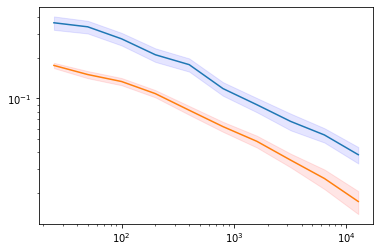

In [21]:
fig, ax = plt.subplots()
n, mean, std = result['n_source'], result['lipton-excess']['mean'], result['lipton-excess']['std']
mean_o, std_o = result['oracle-excess']['mean'], result['oracle-excess']['std']
ax.plot(n,mean)
ax.plot(n,mean_o)
ax.fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax.fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$\\mathcal{E}(\\hat f)$')
ax.set_xlabel('$n_P$')